# Overview 

* Limited parking space and traffic congestion are two significant problems facing Downtown San Diego right now. 
* [Several research studies](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.517.4915&rep=rep1&type=pdf) reveal the negative correlation between on-street parking and road capacity. 
* Inspired by this idea, in this project, we use the two datasets: `sd_parking_meters_loc` and `sd_trffic` from  [Data SD website](https://data.sandiego.gov/datasets/) to answer the question -- __will the presence of traffic meters affects the street's traffic volume in Downtown San Deigo__. 
* Using bootstrap and A/B hypothesis testing, we find that the existence of parking meters on the street will actually __decrease__ the traffic volume, which is consistent with our expectation and the previous research results.
<line>
<line>

# Members Names and IDs

* __Jianfan Chen A92086442__
    * Data Analysis
    * Data Cleaning
* __James Cor A14951555__
    * Data Cleaning
    * Data Aggregation
* __Yikai Hao A15019221__
    * Data Collection
    * Visualization
* __Zhuojun Ying A15538436__
    * Data Collection
    * Visualization

# Research Question

* How will the presence of the parking meters influence the corresponding street's traffic volume in Downtown San Diego? 

# Background and Prior Work 

* It is still controversial about the relationship between parking spaces and traffic congestion. On the one hand, Eric Jaffe argues that “parking provision in cities is a likely cause of increased driving among residents and employees in those places,”(Jaffe, 2016) and cities should consider new policies which limit the parking areas in order to decrease the appearance of traffic jam. 
<br>
<br>
* On the other hand, according to Skyline Parking AG, on-street parking would reduce road capacity because many cars would cruise on streets looking for available and cheaper parking spaces. This would take as long as 20 minutes, taking up to 10% of the local circulation, reducing the space for other vehicles to pass through this road section.(Calorie, 2014)
<br>
<br>
* Additionally, based on our personal experience, the lack of parking space usually causes traffic congestion. It is a common phenomenon that the drivers who try to find a parking space stop in the middle of the road and block the traffic (Clorie, 2014). Also, there are lots of other factors that can also influence the time vehicle owners spend to find a parking space, like the parking fee and the location of the parking lot. 
<br>
<br>
* Our project is inspired by our personal experience. At the weekends, it is often hard for us to find a parking space on Convoy Street in San Diego. We find some of the parking lots full of cars, while others almost empty. Therefore, by exploring the relationship between the number of parking meters and traffic congestion, we hope to  find a more efficient way to distribute the parking meters, thus decreasing the number of time people spend finding a place to park. This would not only save time for all citizens, but according to Calorie, could also reduce excessive carbon emissions. 
<br>
<br>
### __Reference__
<br>
* Jaffe, Eric, et al. “Does Excess Parking Actually Cause More People to Drive?” CityLab, 12 Jan. 2016, http://www.citylab.com/transportation/2016/01/the-strongest-case-yet-that-excessive-parking-causes-more-driving/423663/.

* Calorie, Ladina. “Car Parking and Traffic Congestion.” Parking Network, 13 June 2014, http://www.parking-net.com/parking-news/skyline-parking-ag/traffic-congestion.



# Hypothesis

* We predict that the presence of parking meters on the densely populated areas in San Diego, specifically in the Downtown, Midtown and Uptown area, would increase traffic congestion and thus decrease the traffic volume. 
<br>
<br>
* If we could identify which properties of parking meters would contribute to the traffic congestions, we might be able to design a more efficient way of distributing the parking meters to balance the neeeds of people finding parking spots and people navigating through the area.

# Data Origin

* https://data.sandiego.gov/datasets/parking-meters-locations/ 
    * Number of Observation: 4932
    * Zone: The parking district to which the meter belongs
    * Area: The neighborhood the meter resides in
    * Sub_area: The block number and street of the meter
    * Pole: Unique pole id
    * Config_code: Configuration code
    * Config_name: Configuration description
    * Longitude: meter location longitude (may not be accurate)
    * Latitude: meter location latitude (may not be accurate)
    
    * __This dataset provides us with the current distribution of parking lot within the San Diego County.__ 
    
* https://data.sandiego.gov/datasets/traffic-volumes/ 
    * Number of Observation: 11659
    * Street_name: The vehicles were counted on this street
    * Limits: The vehicles were counted between these cross streets
    * Northbound_count: The 24 hour count of northbound vehicles
    * Southbound_count: The 24 hour count of southbound vehicles
    * Eastbound_count: The 24 hour count of eastbound vehicles
    * Westbound_count: The 24 hour count of westbound vehicles
    * Total_count: The 24 hour total of all directions of vehicles combined
    * Count_date: The vehicles were counted on this date
    * 
    * __This dataset associates with the traffic congestion/volume in the San Diego county. We will later use it as a reference to analyze the potential/ideal spots for new parking lots.__
 

* __Additional Resources:__ 
    * https://www.spotangels.com/san-diego-parking
    * For identifying the location of existing parking lots in the San Diego County
    <br>
    <br>
    * https://data.sandiego.gov/datasets/gid-72-hour-violation/ 
    * To find the area that has more parking lots to be accommodated from illegal parking statistics
    <br>
    <br>
    * https://data.world/san-diego/business-listings/workspace/file?filename=active_business_listings.csv 
    * A list of San Diego business districts that we could use as a reference of locating the crowded areas in San Diego
    <br>
    <br>
    * http://www.dot.ca.gov/trafficops/census/
    * Traffic volume of different highways in San Diego during peak hours


# Imports

In [1]:
# Import libraries for visualization, cleaning, and analysis
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import seaborn as sns
from scipy.stats import kstest

# Parking Data Cleaning

In [2]:
# Read in parking data and dictionary
df_parking = pd.read_csv('./data/sd_parking_meters_loc.csv')
parking_dict = pd.read_csv('./data/sd_parking_meters_loc_dict.csv')

In [3]:
# Print parking dict, which gives us a basic description of the dataset 
parking_dict.drop('Values', axis = 1)

Field                                      Description
0         zone  The parking district to which the meter belongs
1         area            The neighborhood the meter resides in
2     sub_area         The block number and street of the meter
3         pole                                   Unique pole id
4  config_code                               Configuration code
5  config_name                        Configuration description
6    longitude   meter location longitude (may not be accurate)
7     latitude    meter location latitude (may not be accurate)

In [4]:
# Remove all missing values
df_parking.dropna(axis = 0, how = 'any', inplace = True, subset = ['pole','longitude','latitude'])
df_parking = df_parking[df_parking['config_id'] != 0]
df_parking.head()

zone          area               sub_area     pole  config_id  \
0  City  Barrio Logan  1000 CESAR CHAVEZ WAY  CC-1003       9000   
1  City  Barrio Logan  1000 CESAR CHAVEZ WAY  CC-1005       9000   
2  City  Barrio Logan  1000 CESAR CHAVEZ WAY  CC-1011       9000   
3  City  Barrio Logan  1000 CESAR CHAVEZ WAY  CC-1013       9000   
4  City  Barrio Logan  1000 CESAR CHAVEZ WAY  CC-1015       9000   

                           config_name   longitude   latitude  
0  2 Hour Max $1.25 HR 8am-6pm Mon-Sat -117.145178  32.700353  
1  2 Hour Max $1.25 HR 8am-6pm Mon-Sat -117.145178  32.700352  
2  2 Hour Max $1.25 HR 8am-6pm Mon-Sat -117.145349  32.700155  
3  2 Hour Max $1.25 HR 8am-6pm Mon-Sat -117.145405  32.700107  
4  2 Hour Max $1.25 HR 8am-6pm Mon-Sat -117.145539  32.699987

First we plotted a scatterplot of the longitude and latitude of the parking meters to look for outliers.

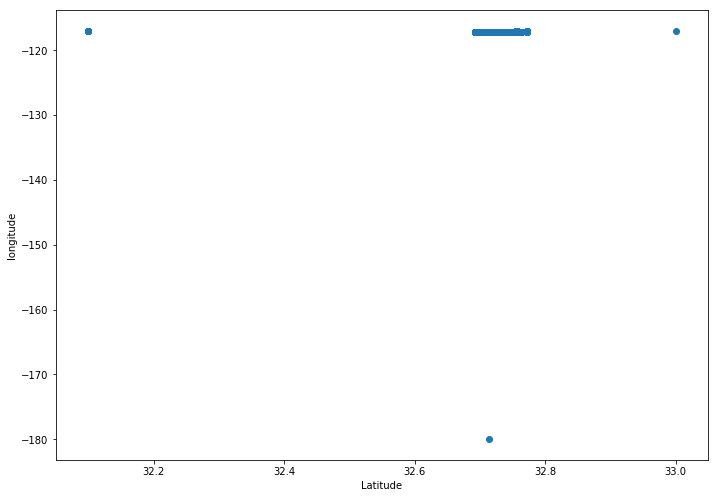

In [5]:
# ploting all the points in df_parking
fig = plt.figure(figsize=(11.7,8.27))
plt.xlabel("Latitude")
plt.ylabel("longitude")
plt.scatter(df_parking['latitude'], df_parking['longitude'])

* From the above scatter plot, we can see that most of the points are centered between 32.6 and 32.8 in `latitude` and larger than -120 in `longitude`. However, there are few points are outside this area and we think they are far from the downtown San Diego. It will be hard for us to see the layout of the cluster of points if we do not drop the "outliers". Therefore, we choose to drop them and plot the same scatter-plot again. The colored plot represents the distribution of the parking meters.

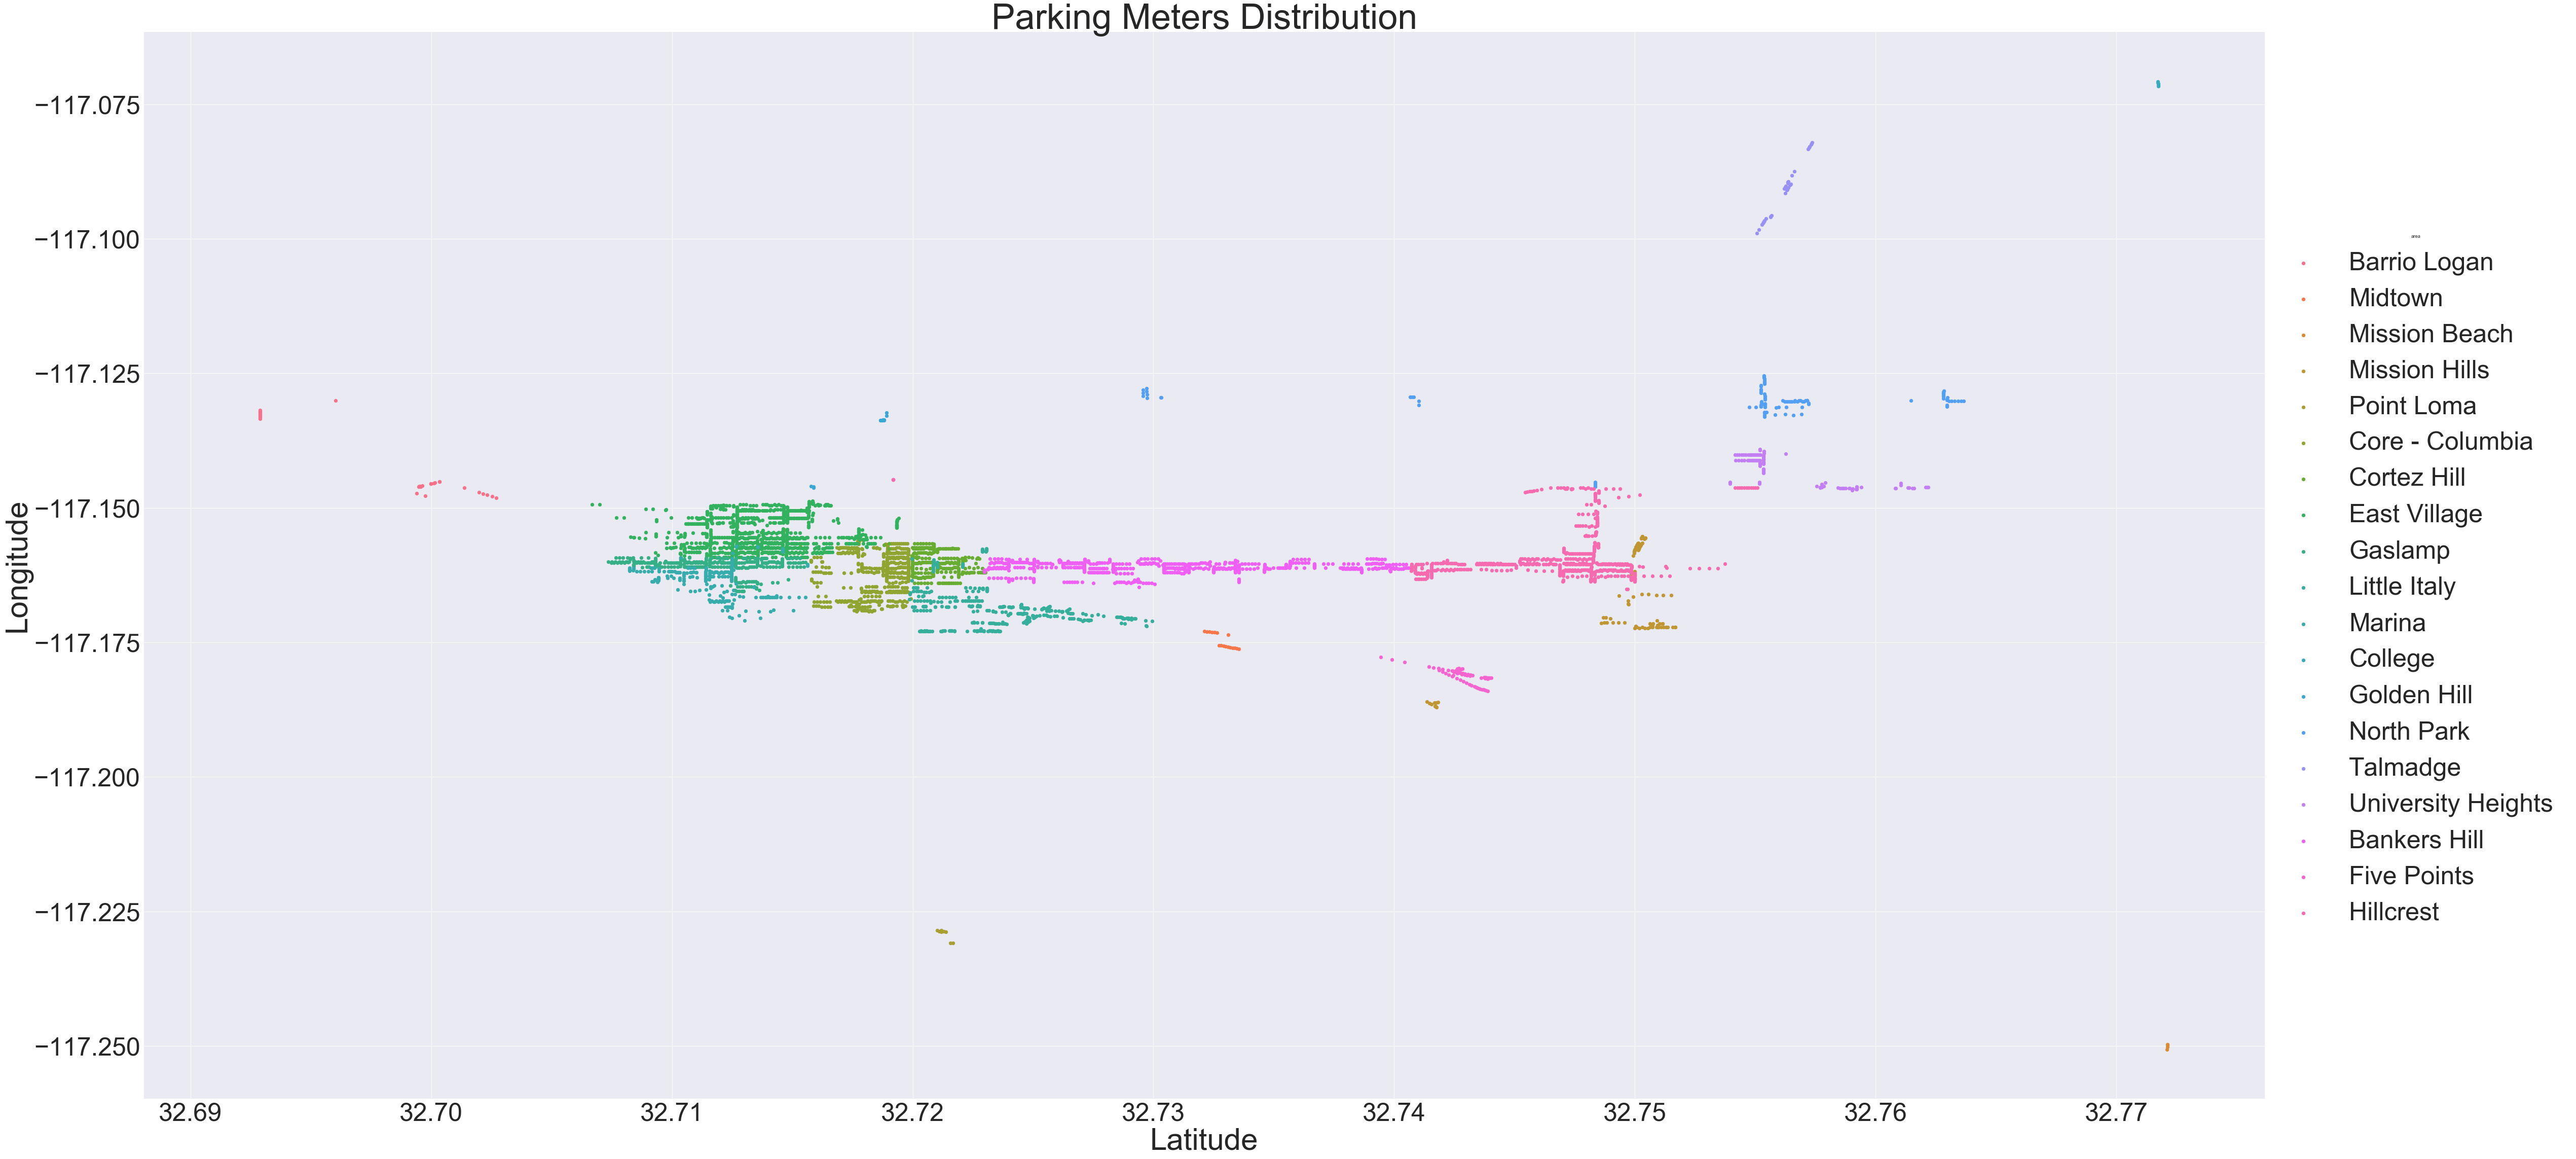

In [107]:
# Remove outliers
df_parking.drop(df_parking[df_parking.latitude <= 32.2].index, inplace = True)
df_parking.drop(df_parking[df_parking.latitude >= 32.85].index,inplace = True)
df_parking.drop(df_parking[df_parking.longitude <= -150].index,inplace = True)
# Use seaborn with colors to display all the parking meters based on area

fig = sns.FacetGrid(data=df_parking, hue='area', aspect=2, size=30)
fig = fig.map(plt.scatter, 'latitude', 'longitude').add_legend(prop={'size': 50})
plt.title('Parking Meters Distribution', size=70)
x_label = plt.xlabel('Latitude', size=60)
x_ticks = plt.xticks(size=50)
y_label = plt.ylabel('Longitude', size=60)
y_ticks = plt.yticks(size=50)

We calculated the maximum and minimum longtitude and latitude of the locations with parking meters to identify our area of investigation. From the longtitudes and latitudes, we could pinpoint our boundaries on google map.

In [37]:
# calculate the range of the longitude and latitude
east_point = df_parking['longitude'].max()
west_point = df_parking['longitude'].min()
north_point= df_parking['latitude'].max()
south_point= df_parking['latitude'].min()
center_long= (east_point + west_point)/2
center_lati= (north_point + south_point)/2
print(' north: {},\n south: {},\n east: {},\n west: {}'.format(north_point, south_point, east_point, west_point))

 north: 32.772126,
 south: 32.692883,
 east: -117.070775,
 west: -117.25069099999999


* Using the calculation results, we can draw a rectangle on the [google map](https://developers.google.com/maps/documentation/javascript/examples/rectangle-simple), which shows the scope of our parking meters location. 

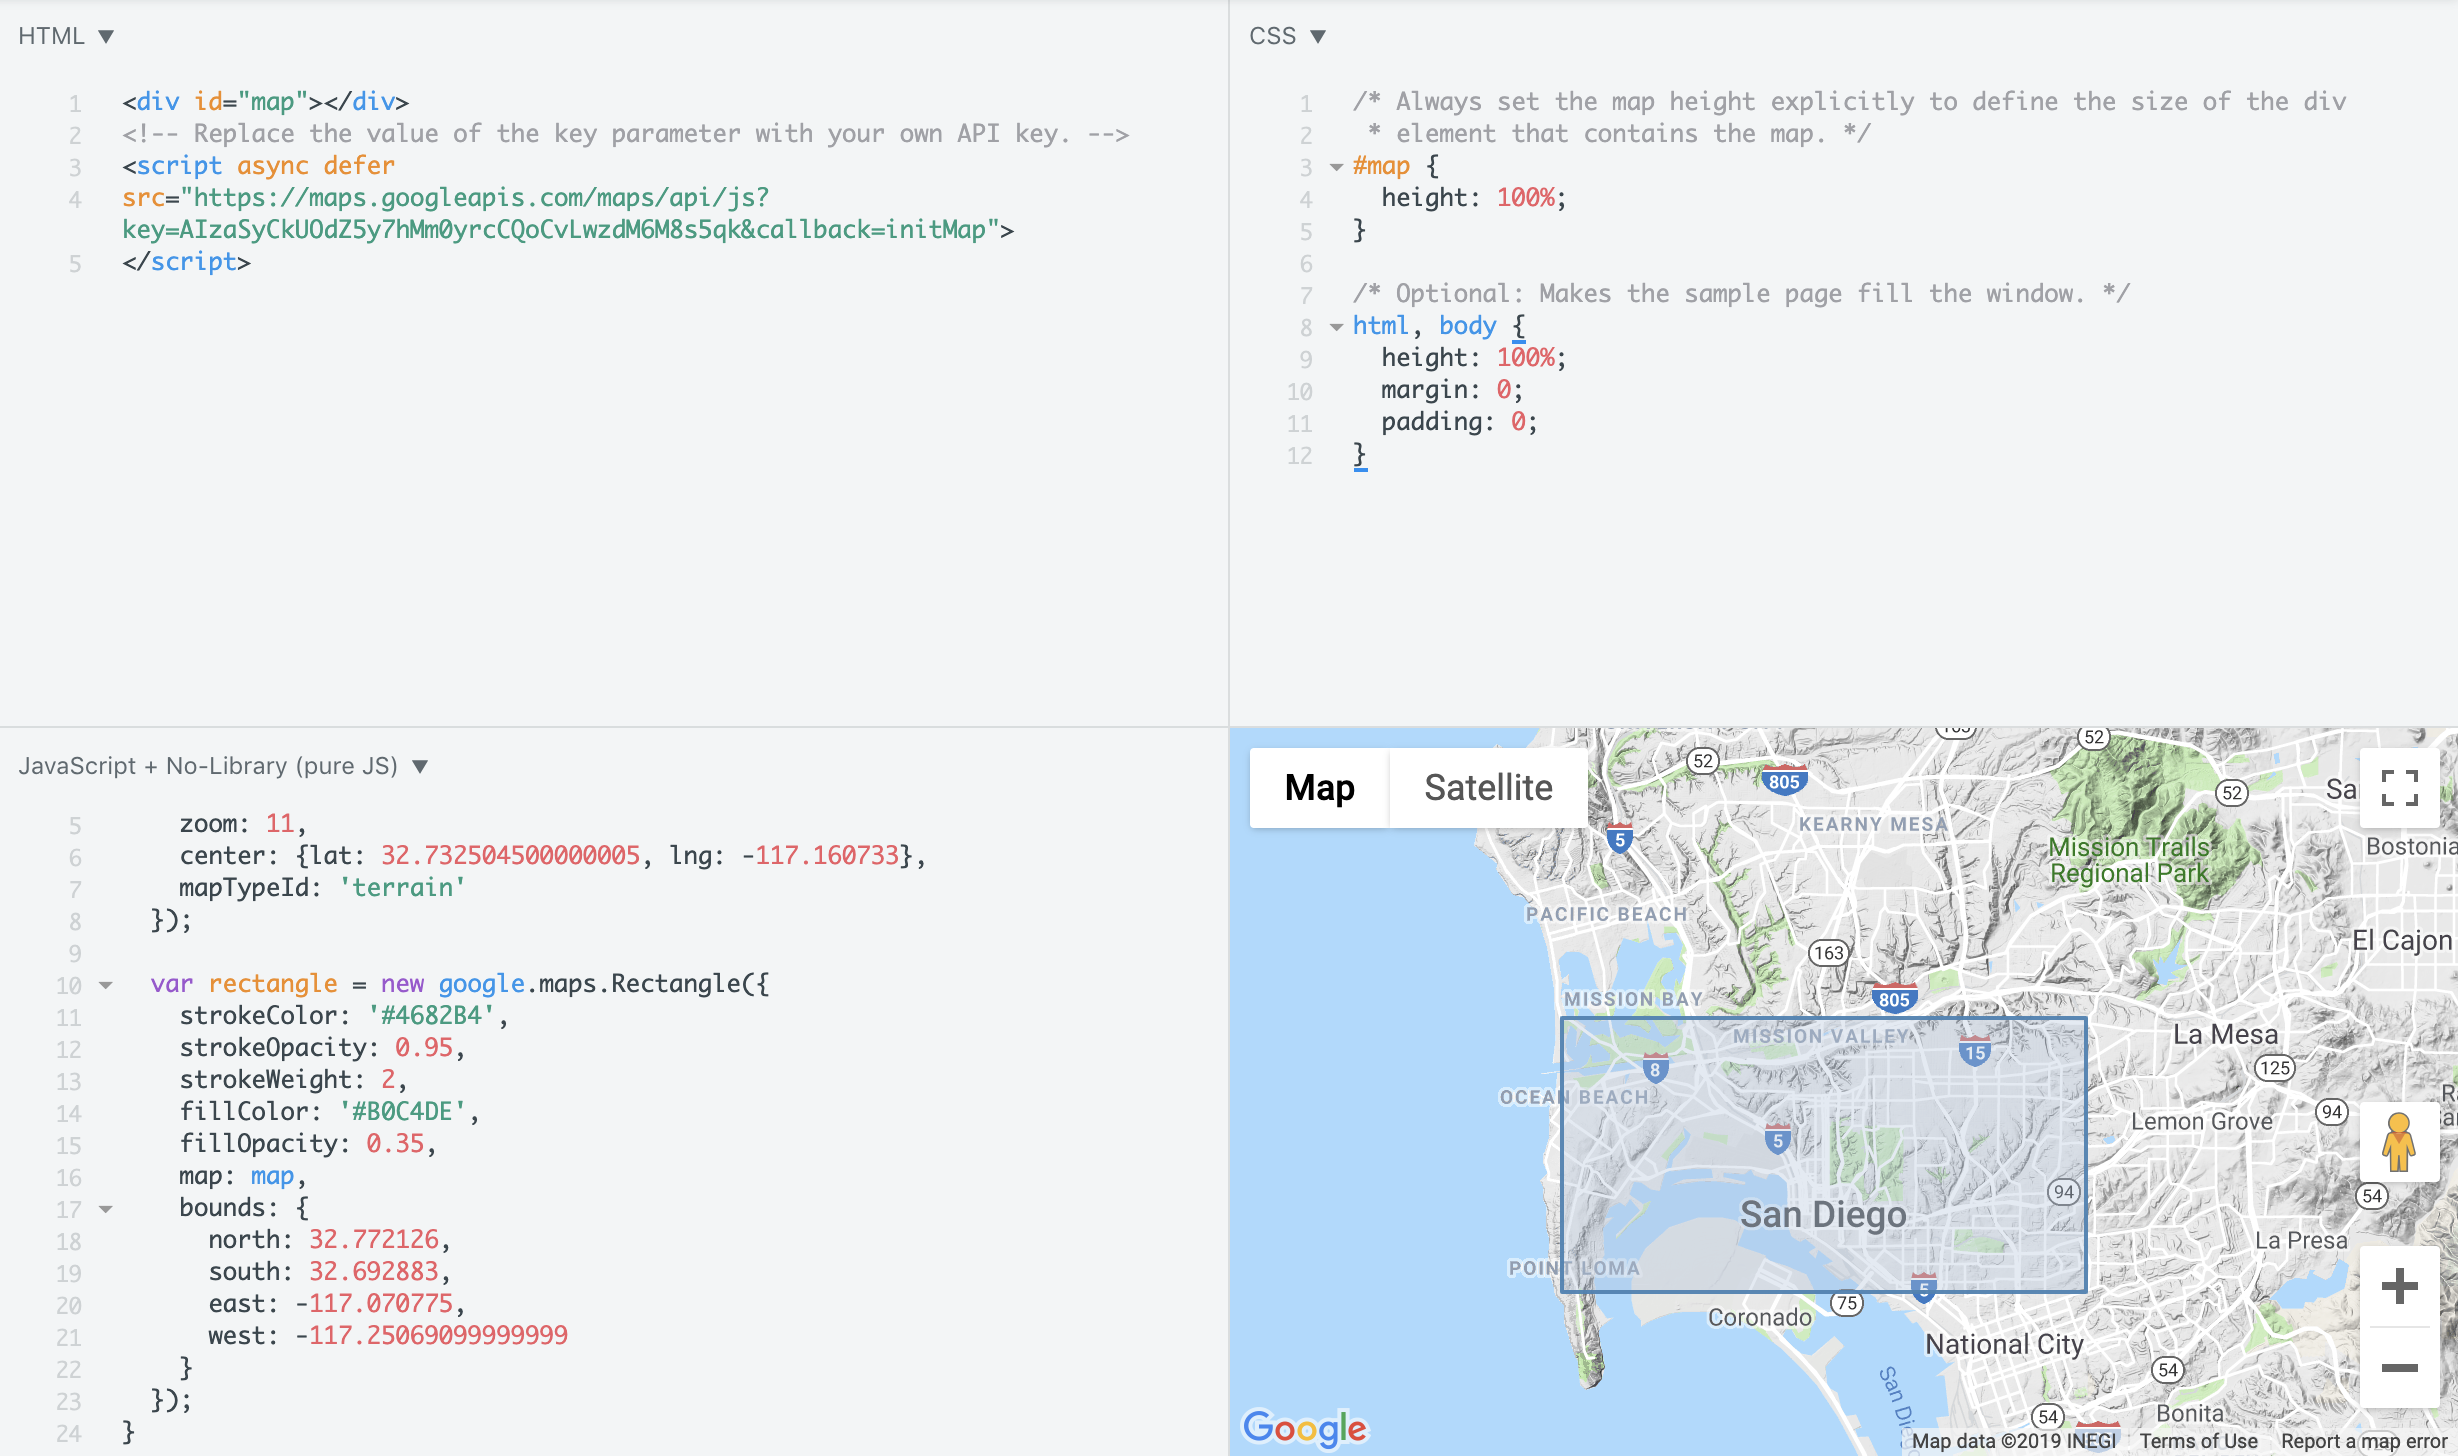

In [44]:
Image('./pic/Google_map_rec.png')

* Comparing this map with the `parking_district` map (below), we can find that our dataset (the parking meters' locations) are clustered in the uptown, mid-city, and downtown area of San Diego, and no/few data points in the other area of San Diego County. Therefore, our project is only limited to the "urban area" of San Diego, which will be explained more in our discussion part. 


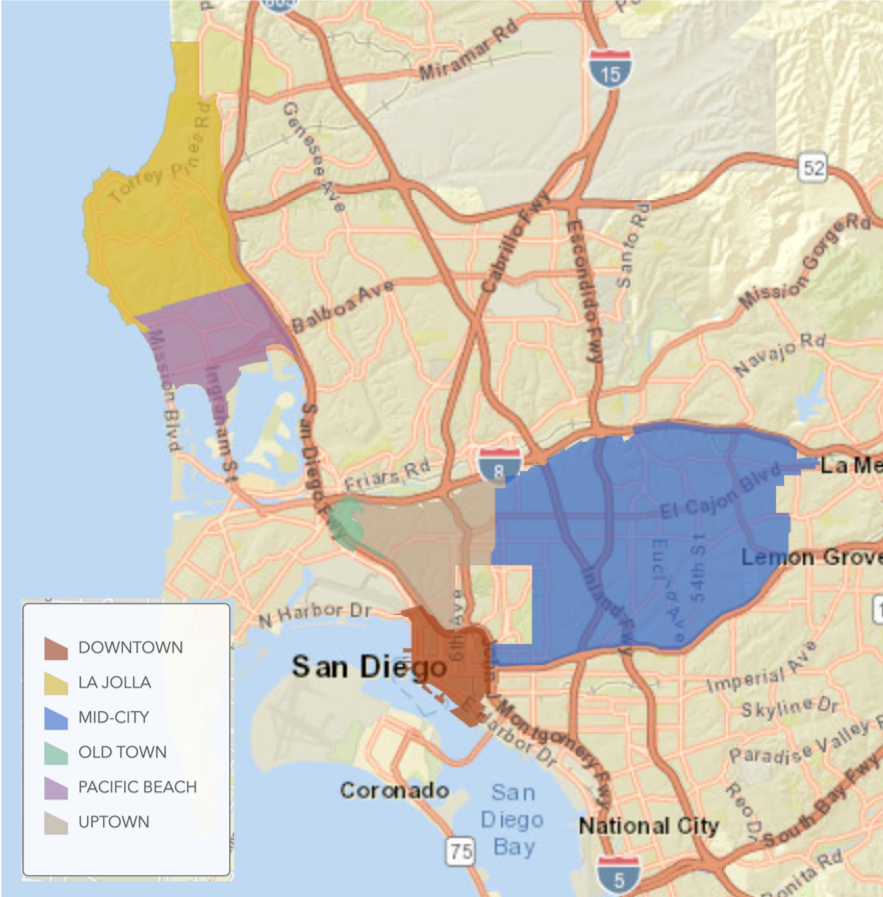

In [68]:
Image("./pic/parking_district.png", width=500, height=500)

* In this part, we define a function to extract all the valuable information about the parking meters from the `config_name` column, and return an array.

* The return `array` includes 7 floats, and each number represents a character of the parking meters:
    * `max_hour`: Maximum Parking Hours
    * `$/h`: Dollar per hour 
    * `open`: Opens at (24-hour clock)
    * `close`: Close at (24-hour clock)
    * `duration`: Opening hours
    * `sat`: Open on Saturday (1 for True and 0 for False)
    * `mobile`: Support mobile pay (1 for True and 0 for False)

In [6]:
# separate the valuable information from the column config_name
def extract_info(string):
    output = np.array([])
    string = string.lower()
    string = string.strip()
    
    # extract the max time information from the given string 
    if "15 min" in string:
        output = np.append(output, 0.25)
    elif "30 min" in string:
        output = np.append(output, 0.5)
    elif "1 hour" in string:
        output = np.append(output, 1)
    elif "2 hour" in string:
        output  = np.append(output, 2)
    elif "4 hour" in string:
        output  = np.append(output, 4)    
    elif "8 hour" in string:
        output = np.append(output, 8)
    elif "9 hour" in string:
        output = np.append(output, 9)
    else: 
        output = np.append(output, np.nan)
        
    # extract the payment information from the given string 
    if "$" in string:
        start = string.find('$')
        output = np.append(output, float(string[start+1:start+5]))
    else:
        output = np.append(output, np.nan)
        
    # extract open hours information from the given string 
    time_str = string.split()
    time_str = [i for i in time_str if ('am' in i and 'pm' in i)]
    if len(time_str) == 0:
        output = np.append(output, np.array([np.nan,np.nan,np.nan]))
    else:
        time_str = time_str[0]
    # deal with the time like 8:30
        if ':30' in time_str: 
            time_str = time_str.replace(':30','.5') 
        morning_hour = float(time_str[:time_str.find('am')])
        evening_hour = float(time_str[time_str.find('-')+1:time_str.find('pm')])+12
        output = np.append(output, morning_hour)
        output = np.append(output, evening_hour)
        # save the duration 
        output = np.append(output, evening_hour - morning_hour)
        
    #extract the info whether the parking meters is avaiable on Sat
    if 'sat' in string:
        output = np.append(output, True)
    elif 'daily' in string:
        output = np.append(output, True)
    else:
        output = np.append(output, False)
        
    # extract the info whether the parking meters support mobile pay 
    if 'mobile' in string:
        output = np.append(output, True)
    else:
        output = np.append(output, False)
        
        
    # There should be 7 float in the output array 
    # The order is [max_hours, payment info, opening_hour, closing_hour, duration, avaiable on Sat, support mobile]
    return output
            
        

* Using the function defined above, we can convert the string information, which is hard to analyze, to the numbers (converting from qualitative data to quantitative data)
* After transforming a long string to an array of floats, we add all the attributes to the data frame as new columns.
* In the function, I set some hard classified data to `np.nan`, and there are only 16/4626 rows containing the `np.nan`, which is too small to influence the data analysis below. Therefore I choose to drop them for easier analysis.


In [7]:
extracted_info = df_parking['config_name'].apply(extract_info)
df_parking['max_hour'] = [i[0] for i in extracted_info]
df_parking['$/h']      = [i[1] for i in extracted_info]
df_parking['open']     = [i[2] for i in extracted_info]
df_parking['close']    = [i[3] for i in extracted_info]
df_parking['duration'] = [i[4] for i in extracted_info]
df_parking['sat']      = [i[5] for i in extracted_info]
df_parking['mobile']   = [i[6] for i in extracted_info]
df_parking.drop('config_name', axis=1, inplace=True)
df_parking.dropna(inplace=True)
df_parking.head()

zone          area               sub_area     pole  config_id   longitude  \
0  City  Barrio Logan  1000 CESAR CHAVEZ WAY  CC-1003       9000 -117.145178   
1  City  Barrio Logan  1000 CESAR CHAVEZ WAY  CC-1005       9000 -117.145178   
2  City  Barrio Logan  1000 CESAR CHAVEZ WAY  CC-1011       9000 -117.145349   
3  City  Barrio Logan  1000 CESAR CHAVEZ WAY  CC-1013       9000 -117.145405   
4  City  Barrio Logan  1000 CESAR CHAVEZ WAY  CC-1015       9000 -117.145539   

    latitude  max_hour   $/h  open  close  duration  sat  mobile  
0  32.700353       2.0  1.25   8.0   18.0      10.0  1.0     0.0  
1  32.700352       2.0  1.25   8.0   18.0      10.0  1.0     0.0  
2  32.700155       2.0  1.25   8.0   18.0      10.0  1.0     0.0  
3  32.700107       2.0  1.25   8.0   18.0      10.0  1.0     0.0  
4  32.699987       2.0  1.25   8.0   18.0      10.0  1.0     0.0

# Traffic Data Cleaning

In [8]:
# Read in data
traffic = pd.read_csv('./data/sd_traffic.csv')
traffic_dict = pd.read_csv('./data/sd_traffic_dict.csv')

In [9]:
# Display traffic data
traffic.head()

id street_name             limits all_count northbound_count  \
0  01AV018207       01 AV      A ST - ASH ST                      18010   
1  01AV015210       01 AV      A ST - ASH ST                      20060   
2  01AV018213       01 AV      A ST - ASH ST                      19597   
3  01AV088812       01 AV  ASH ST - BEECH ST                       2298   
4  01AV068711       01 AV        B ST - A ST                      15625   

   southbound_count  eastbound_count  westbound_count  total_count  file_no  \
0               NaN              NaN              NaN        18010  0182-07   
1               NaN              NaN              NaN        20060  0152-10   
2               NaN              NaN              NaN        19597  0182-13   
3               NaN              NaN              NaN         2298  0888-12   
4               NaN              NaN              NaN        15625  0687-11   

            count_date  
0  2007-03-13 00:00:00  
1  2010-03-18 00:00:00  
2  2013-03-12 00:00:00  
3  2012-12-11 00:00:00  
4  2011-09-01 00:00:00

In [10]:
# Display traffic_dict, which contains explanation of each of the columns
traffic_dict

Field                                        Description
0       street_name           The vehicles were counted on this street
1            limits  The vehicles were counted between these cross ...
2  northbound_count           The 24 hour count of northbound vehicles
3  southbound_count           The 24 hour count of southbound vehicles
4   eastbound_count            The 24 hour count of eastbound vehicles
5   westbound_count            The 24 hour count of westbound vehicles
6       total_count  The 24 hour total of all directions of vehicle...
7        count_date             The vehicles were counted on this date

* It appears that there are measurements from several dates for the same section of the street, so we'll combine them together for simplicity.
* Then we reformat the DataFrame so that it is easier to perform geocoding on later.

In [11]:
# Group by street_name and limits and sum the traffic counts.
df_traffic = traffic.groupby(['street_name', 'limits']).sum().reset_index()
# Separate the limit column into 2 separate columns
tmp = df_traffic['limits'].str.split(" - ", n = 1, expand = True)
# Reassign the columns to our DaatFrame
df_traffic['limit_0'] = tmp[0]
df_traffic['limit_1'] = tmp[1]
# Reorder columns
df_traffic = df_traffic[['street_name', 'limit_0', 'limit_1', \
                         'total_count', 'southbound_count', 'eastbound_count', 'westbound_count']]
df_traffic.head()

street_name   limit_0   limit_1  total_count  southbound_count  \
0       01 AV      A ST    ASH ST        57667               0.0   
1       01 AV    ASH ST  BEECH ST         2298               0.0   
2       01 AV      B ST      A ST        29194               0.0   
3       01 AV      B ST      C ST        27384               0.0   
4       01 AV  BEECH ST  CEDAR ST       118715               0.0   

   eastbound_count  westbound_count  
0              0.0              0.0  
1              0.0              0.0  
2              0.0              0.0  
3              0.0              0.0  
4              0.0              0.0

* Standardize the street names so that they can be geocoded.

In [12]:
# Import python's regex library
import re

In [13]:
# Function to reformat street names
def standardize_street(street):
    # Strip out everything but numbers
    tmp = re.sub("[^0-9]", "", street)
    if (tmp):
        # Check for all cases
        tmp = int(tmp)
        if tmp == 11:
            street = street.replace("11", "11TH")
        elif tmp % 10 == 1:
            street = street.replace(str(tmp), str(tmp) + "ST")
        elif tmp % 10 == 2:
            street = street.replace(str(tmp), str(tmp) + "ND")
        elif tmp % 10 == 3:
            street = street.replace(str(tmp), str(tmp) + "RD")
        else:
            street = street.replace(str(tmp), str(tmp) + "TH")
            
        street = street.replace("0" + str(tmp), str(tmp))
    return street

In [14]:
# Apply our function
df_traffic['street_name'] = df_traffic['street_name'].apply(standardize_street)
df_traffic['limit_0'] = df_traffic['limit_0'].apply(standardize_street)
df_traffic['limit_1'] = df_traffic['limit_1'].apply(standardize_street)
df_traffic.head()

street_name   limit_0   limit_1  total_count  southbound_count  \
0      1ST AV      A ST    ASH ST        57667               0.0   
1      1ST AV    ASH ST  BEECH ST         2298               0.0   
2      1ST AV      B ST      A ST        29194               0.0   
3      1ST AV      B ST      C ST        27384               0.0   
4      1ST AV  BEECH ST  CEDAR ST       118715               0.0   

   eastbound_count  westbound_count  
0              0.0              0.0  
1              0.0              0.0  
2              0.0              0.0  
3              0.0              0.0  
4              0.0              0.0

* Now that the street names have been standardized, we can get the coordinates. There were a couple issues with the geocoding library, geopy, we used. We weren't able to use Google's Map API, as it is no longer free, we used an open source one called Nominatim.
<br>
<br>
* Nominatim has a few restrictions, as listed on their [usage policy:](https://operations.osmfoundation.org/policies/nominatim/)
<br>
<br>
* So we did our best to limit the number of requests we did at one time, and paused for a second in between queries. The street_queries dictionary helped to dramatically reduce the number of queries we had to make, as we saved many of them.
<br>
<br>
* Additionally, Nominatim is unable to give us coordinates for two street intersections However, Nominatim is able to give us some point along a street. Using this information, and the direction of traffic flow, we are able to get a really good approximation of where the intersection should be.

In [15]:
# Import libary for geocoding
from geopy.geocoders import Nominatim
import time
geolocator = Nominatim(user_agent="cogs_108")

In [17]:
# Dict of all previous queries
street_queries = {}

# Lists of all intersections (nulls are (0,0))
inter_0 = []
inter_1 = []
missing = []

# Go through entire df
for index, row in df_traffic.iterrows():
    # Save streets, need to append San Diego for queries to work
    st = row['street_name'] + ', San Diego'
    c0 = row['limit_0'] + ', San Diego'
    c1 = row['limit_1'] + ', San Diego'
    
    # Look up all needed streets
    if st not in street_queries:
        st_loc = geolocator.geocode(st)
        if st_loc == None:
            street_queries[st] = None
        else:
            street_queries[st] = (st_loc.latitude, st_loc.longitude)
        time.sleep(1) # pause to avoid bulk requests
        
    if c0 not in street_queries:
        c0_loc = geolocator.geocode(c0)
        if c0_loc == None:
            street_queries[c0] = None
        else:
            street_queries[c0] = (c0_loc.latitude, c0_loc.longitude)
        time.sleep(1) # pause to avoid bulk requests
        
    if c1 not in street_queries:
        c1_loc = geolocator.geocode(c1)
        if c1_loc == None:
            street_queries[c1] = None
        else:
            street_queries[c1] = (c1_loc.latitude, c1_loc.longitude)
        time.sleep(1) # pause to avoid bulk requests
        
    # Skip any nulls
    if street_queries[st] == None or street_queries[c0] == None or street_queries[c1] == None:
        print(row['street_name'], ", ", row['limit_0'], ", ", row['limit_1'])
        missing.append((row['street_name'], row['limit_0'], row['limit_1']))
        inter_0.append((0, 0))
        inter_1.append((0, 0))
        continue
    
    # Longitude is correct
    if row['eastbound_count'] == 0 and row['westbound_count'] == 0:
        inter_0.append((street_queries[c0][0], street_queries[st][1]))
        inter_1.append((street_queries[c1][0], street_queries[st][1]))
    else:
        inter_0.append((street_queries[st][0], street_queries[c0][1]))
        inter_1.append((street_queries[st][0], street_queries[c1][1]))

In [18]:
# Add these columns to the DataFrame
df_traffic['inter_0'] = inter_0
df_traffic['inter_1'] = inter_1

In [19]:
# Save this to a file, so we don't have to do this again
df_traffic.to_csv('./data/sd_traffic_all_parts_done.csv')

In [22]:
# Reread data into DataFrame
df_traffic = pd.read_csv('./data/sd_traffic_all_parts_done.csv')
# Save the original shape to a variable
original_shape = df_traffic.shape
df_traffic.head()

Unnamed: 0 street_name   limit_0   limit_1  total_count  southbound_count  \
0           0      1ST AV      A ST    ASH ST        57667               0.0   
1           1      1ST AV    ASH ST  BEECH ST         2298               0.0   
2           2      1ST AV      B ST      A ST        29194               0.0   
3           3      1ST AV      B ST      C ST        27384               0.0   
4           4      1ST AV  BEECH ST  CEDAR ST       118715               0.0   

   eastbound_count  westbound_count           cross_0           cross_1  \
0              0.0              0.0      01 AV & A ST    01 AV & ASH ST   
1              0.0              0.0    01 AV & ASH ST  01 AV & BEECH ST   
2              0.0              0.0      01 AV & B ST      01 AV & A ST   
3              0.0              0.0      01 AV & B ST      01 AV & C ST   
4              0.0              0.0  01 AV & BEECH ST  01 AV & CEDAR ST   

                      inter_0                     inter_1  
0  (32.7188373, -117.1638012)  (32.7198934, -117.1638012)  
1  (32.7198934, -117.1638012)  (32.7209311, -117.1638012)  
2  (32.7178034, -117.1638012)  (32.7188373, -117.1638012)  
3  (32.7178034, -117.1638012)  (32.7166901, -117.1638012)  
4  (32.7209311, -117.1638012)  (32.7219866, -117.1638012)

In [23]:
# Remove extra unnamed column
df_traffic = df_traffic.drop(columns=['Unnamed: 0'])
# Remove all intersections we were unable to find
df_traffic = df_traffic[df_traffic['inter_0'] != '(0, 0)']
# update the shape of our df after dropped the empty data
new_shape = df_traffic.shape
print("There are {} rows in the original datasets.\n\
After we dropped the unamed and unfound rows, there are {} rows remaining.".format(original_shape[0],new_shape[0]))

There are 3998 rows in the original datasets.
After we dropped the unamed and unfound rows, there are 2872 rows remaining.


We dropped 1126 rows in total, which take 28% of our raw data. Missing such a large amount of data may influence our result a lot, which will be discussed more in our discussion part.

In [24]:
# Function to make the coordinates readable
def remove_parentheses(coords):
    coords = coords.replace('(', '')
    coords = coords.replace(')', '')
    return coords

# Apply function
df_traffic['inter_0'] = df_traffic['inter_0'].apply(remove_parentheses)
df_traffic['inter_1'] = df_traffic['inter_1'].apply(remove_parentheses)

# Separate the limit column into 2 separate columns
tmp0 = df_traffic['inter_0'].str.split(", ", n = 1, expand = True)
tmp1 =  df_traffic['inter_1'].str.split(", ", n = 1, expand = True)

# Convert coordinates to float
df_traffic['inter_0_lat'] = tmp0[0].astype(float)
df_traffic['inter_0_long'] = tmp0[1].astype(float)
df_traffic['inter_1_lat'] = tmp1[0].astype(float)
df_traffic['inter_1_long'] = tmp1[1].astype(float)

# drop the useless column and make our dataframe much clear 
df_traffic.drop(['limit_0','limit_1','southbound_count','eastbound_count',\
                 'westbound_count','cross_0','cross_1','inter_0','inter_1'], axis=1, inplace = True)
df_traffic.head()

street_name  total_count  inter_0_lat  inter_0_long  inter_1_lat  \
0      1ST AV        57667    32.718837   -117.163801    32.719893   
1      1ST AV         2298    32.719893   -117.163801    32.720931   
2      1ST AV        29194    32.717803   -117.163801    32.718837   
3      1ST AV        27384    32.717803   -117.163801    32.716690   
4      1ST AV       118715    32.720931   -117.163801    32.721987   

   inter_1_long  
0   -117.163801  
1   -117.163801  
2   -117.163801  
3   -117.163801  
4   -117.163801

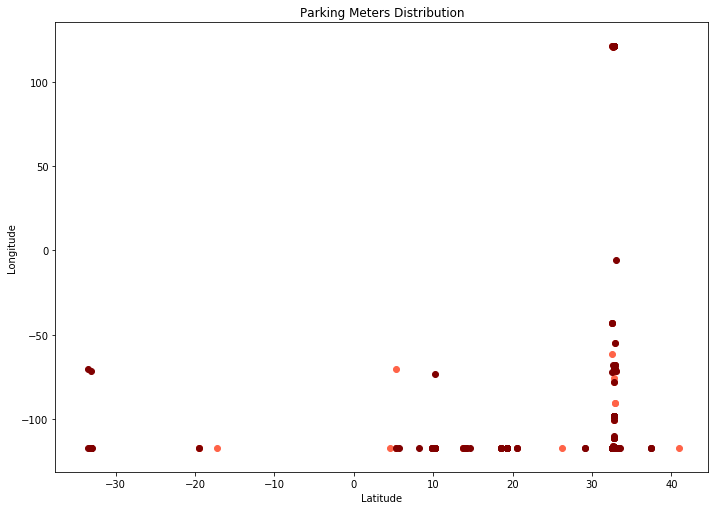

In [25]:
# Get an idea of how our streets are 
fig = plt.figure(figsize=(11.7,8.27))
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title('Parking Meters Distribution')
plt.scatter(df_traffic['inter_0_lat'], df_traffic['inter_0_long'], color='tomato')
plt.scatter(df_traffic['inter_1_lat'], df_traffic['inter_1_long'], color='maroon')

* From the scatter plot above, we can see that similar to the parking meter's dataset, there are some points are outside our interested area(downtown San Diego and surrounding area). 
* Therefore, in order to keep the consistency of all the datasets, we decide to use the same criterion here to drop the "outliers" 

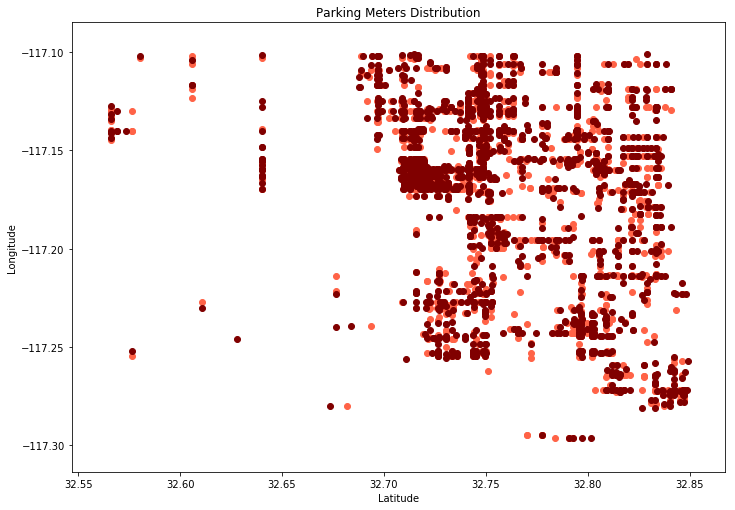

In [26]:
# Remove outliers
df_traffic.drop(df_traffic[df_traffic['inter_0_lat'] <= 32.2].index, inplace = True)
df_traffic.drop(df_traffic[df_traffic['inter_1_lat'] <= 32.2].index, inplace = True)
df_traffic.drop(df_traffic[df_traffic['inter_0_lat'] >= 32.85].index, inplace = True)
df_traffic.drop(df_traffic[df_traffic['inter_1_lat'] >= 32.85].index, inplace = True)
df_traffic.drop(df_traffic[df_traffic['inter_0_long'] >= -117.1].index, inplace = True)
df_traffic.drop(df_traffic[df_traffic['inter_1_long'] >= -117.1].index, inplace = True)
df_traffic.drop(df_traffic[df_traffic['inter_0_long'] <= -117.3].index, inplace = True)
df_traffic.drop(df_traffic[df_traffic['inter_1_long'] <= -117.3].index, inplace = True)

# Get an idea of how our streets are distributed
fig = plt.figure(figsize=(11.7,8.27))
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title('Parking Meters Distribution')
plt.scatter(df_traffic['inter_0_lat'], df_traffic['inter_0_long'], color = 'tomato')
plt.scatter(df_traffic['inter_1_lat'], df_traffic['inter_1_long'], color = 'maroon')

* The final step is to combine our two datasets together by comparing the `longitude` and `latitude` columns.
* Then we will add a new column called `has_meters` in the `df_traffic` dataset to represent whether this street contains `True` or not contains `False` parking meters

In [27]:
# Check if there are parking meters around these intersections
has_meter = []
lower_lats = np.array([])
upper_lats = np.array([])
lower_longs = np.array([])
upper_longs = np.array([])

street_width = 1/700 # This is approx 500ft in degrees it's the width of the street
for index, row in df_traffic.iterrows():
    # Street goes from North to South
    if row['inter_0_lat'] == row['inter_1_lat']:
        lower_lat = min(row['inter_0_lat'], row['inter_1_lat']) - street_width
        upper_lat = max(row['inter_0_lat'], row['inter_1_lat']) + street_width
        lower_long = min(row['inter_0_long'], row['inter_1_long'])
        upper_long = max(row['inter_0_long'], row['inter_1_long'])
    # Street goes from West to East
    else:
        lower_lat = min(row['inter_0_lat'], row['inter_1_lat'])
        upper_lat = max(row['inter_0_lat'], row['inter_1_lat'])
        lower_long = min(row['inter_0_long'], row['inter_1_long']) - street_width
        upper_long = max(row['inter_0_long'], row['inter_1_long']) + street_width
    
    # check whether this street contains a parking meter
    df = df_parking[(df_parking['latitude'] >= lower_lat) & \
                    (df_parking['latitude'] <= upper_lat) & \
                    (df_parking['longitude'] >= lower_long) & \
                    (df_parking['longitude'] <= upper_long)]
    
    has_meter.append(not df.empty)
    lower_lats = np.append(lower_lats, lower_lat)
    upper_lats = np.append(upper_lats, upper_lat)
    lower_longs = np.append(lower_longs, lower_long)
    upper_longs = np.append(upper_longs, upper_long)
    
# Append as column
df_traffic['has_meter'] = has_meter
df_traffic['lower_lat'] = lower_lats
df_traffic['upper_lat'] = upper_lats
df_traffic['lower_long'] = lower_longs
df_traffic['upper_long'] = upper_longs
df_traffic['contain_parking_meters'] = np.empty((len(df_traffic), 0)).tolist()

# drop the original intersection latitude and longitude 
df_traffic.drop(['inter_0_lat', 'inter_0_long', 'inter_1_lat','inter_1_long'], axis=1, inplace = True)
df_traffic.head()

street_name  total_count  has_meter  lower_lat  upper_lat  lower_long  \
0      1ST AV        57667       True  32.718837  32.719893  -117.16523   
1      1ST AV         2298       True  32.719893  32.720931  -117.16523   
2      1ST AV        29194       True  32.717803  32.718837  -117.16523   
3      1ST AV        27384       True  32.716690  32.717803  -117.16523   
4      1ST AV       118715       True  32.720931  32.721987  -117.16523   

   upper_long contain_parking_meters  
0 -117.162373                     []  
1 -117.162373                     []  
2 -117.162373                     []  
3 -117.162373                     []  
4 -117.162373                     []

In [28]:
# adding the indeces of the parking meters that are on this street
for parking_index, parking_row in df_parking.iterrows():
    selected = df_traffic[df_traffic['lower_lat'] < parking_row['latitude']]
    selected = selected[selected['upper_lat'] > parking_row['latitude']]
    selected = selected[selected['lower_long'] < parking_row['longitude']]
    selected = selected[selected['upper_long'] > parking_row['longitude']]
    
    if len(selected['street_name']) != 0:
        for selected_index, selected_row in selected.iterrows():
            df_traffic.loc[selected_index,'contain_parking_meters'].append(parking_index) 
df_traffic.head()

street_name  total_count  has_meter  lower_lat  upper_lat  lower_long  \
0      1ST AV        57667       True  32.718837  32.719893  -117.16523   
1      1ST AV         2298       True  32.719893  32.720931  -117.16523   
2      1ST AV        29194       True  32.717803  32.718837  -117.16523   
3      1ST AV        27384       True  32.716690  32.717803  -117.16523   
4      1ST AV       118715       True  32.720931  32.721987  -117.16523   

   upper_long                             contain_parking_meters  
0 -117.162373  [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 8...  
1 -117.162373  [595, 596, 597, 598, 599, 600, 613, 614, 615, ...  
2 -117.162373  [264, 267, 418, 419, 420, 421, 422, 423, 572, ...  
3 -117.162373                                         [416, 417]  
4 -117.162373  [601, 602, 603, 604, 605, 606, 607, 608, 609, ...

Then we combined the parking and traffic dataset together. `df_combined` has two columns indicating the total volume count on eac street and whether this street contains parking meters. `df_with_meter` only contains the streets with parking meters and contains information on the seven parameters parsed from the `config_id`.

In [29]:
# Combine the two dataset together 
df_combined = pd.DataFrame()
df_combined['total_volume_count'] = df_traffic['total_count']
df_combined['has_meter'] = df_traffic['has_meter']

df_with_meter = df_traffic[df_traffic['has_meter'] == True].copy()
df_with_meter.drop(['street_name','has_meter','lower_lat','upper_lat','lower_long','upper_long'], axis = 1, \
                   inplace = True)
df_with_meter['meter_count'] = [len(i) for i in df_with_meter['contain_parking_meters']]
df_with_meter.rename(index=str, columns={"total_count": "total_volume_count"}, inplace = True)

avg_max_hour = np.array([])
avg_pay      = np.array([])
avg_duration = np.array([])
sat_count    = np.array([])
mobile_count = np.array([])

for parking_indexs in df_with_meter['contain_parking_meters']:
    max_hour = np.array([])
    pay      = np.array([])
    duration = np.array([])
    sat    = 0
    mobile = 0
    
    for parking_index in parking_indexs:
        max_hour = np.append(max_hour, df_parking.loc[parking_index,'max_hour'])
        pay      = np.append(pay, df_parking.loc[parking_index,'$/h'])
        duration = np.append(duration, df_parking.loc[parking_index,'duration'])
        sat    += df_parking.loc[parking_index, 'sat']
        mobile += df_parking.loc[parking_index, 'mobile']
        
    avg_max_hour = np.append(avg_max_hour, np.mean(max_hour))
    avg_pay      = np.append(avg_pay, np.mean(pay))
    avg_duration = np.append(avg_duration, np.mean(duration))
    sat_count    = np.append(sat_count, sat)
    mobile_count = np.append(mobile_count, mobile)
    
df_with_meter['avg_max_hour'] = avg_max_hour
df_with_meter['avg_pay']      = avg_pay
df_with_meter['avg_duration'] = avg_duration
df_with_meter['sat_count']    = sat_count
df_with_meter['mobile_count'] = mobile_count 
df_with_meter.drop(['contain_parking_meters'], axis=1, inplace=True)
df_with_meter.head()

total_volume_count  meter_count  avg_max_hour  avg_pay  avg_duration  \
0               57667           47        2.0000     1.25      9.744681   
1                2298           28        2.0000     1.25      9.571429   
2               29194           11        2.0000     1.25     10.000000   
3               27384            2        2.0000     1.25     10.000000   
4              118715           20        1.9125     1.25      8.800000   

   sat_count  mobile_count  
0       47.0           0.0  
1       28.0           0.0  
2       11.0           0.0  
3        2.0           0.0  
4       20.0           0.0

# Data Analysis

Then we move on to the data analysis part.

In [30]:
df_combined.head()

total_volume_count  has_meter
0               57667       True
1                2298       True
2               29194       True
3               27384       True
4              118715       True

In [31]:
df_combined.groupby('has_meter').count()

total_volume_count
has_meter                    
False                    1191
True                      319

In [32]:
# observed statistic 
df_combined.groupby('has_meter').mean()

total_volume_count
has_meter                    
False            35474.030227
True             29520.410658

* In `df_combined`,  there are 319 streets with parking meters and 1191 streets without parking meters. And if we calculate the mean of traffic volume, we can see that the mean `total_volume_count` is larger in the street without parking meter. It seems that 

Text(0, 0.5, 'Percent per Unit')

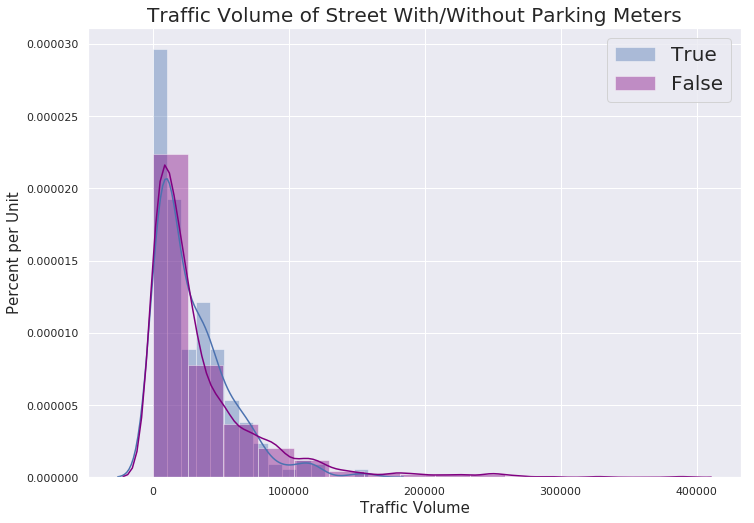

In [33]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot the histogram for the street with parking meters 
df_yes = df_combined[df_combined.has_meter == True]
sns.distplot(df_yes['total_volume_count'], label='True', norm_hist=True, color='b', bins=15)
df_no  = df_combined[df_combined.has_meter == False]
sns.distplot(df_no['total_volume_count'], label='False', norm_hist=True, color='purple', bins=15)

plt.legend(prop={'size': 20})
plt.title('Traffic Volume of Street With/Without Parking Meters', size=20)
plt.xlabel('Traffic Volume', size=15)
plt.ylabel('Percent per Unit', size=15)

* The distribution of the traffic volume of the street with parking meters and the distribution of the traffic volume of the street with no parking meter seem to overlap with each other(probably the traffic volume of street with parking meters is slightly smaller than the street with no parking meter) and it is hard to tell the differences from the histogram above. 
<br>
<br>
* To resolve the skewness towards large values, we plotted the above data again using logarithm scale.

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


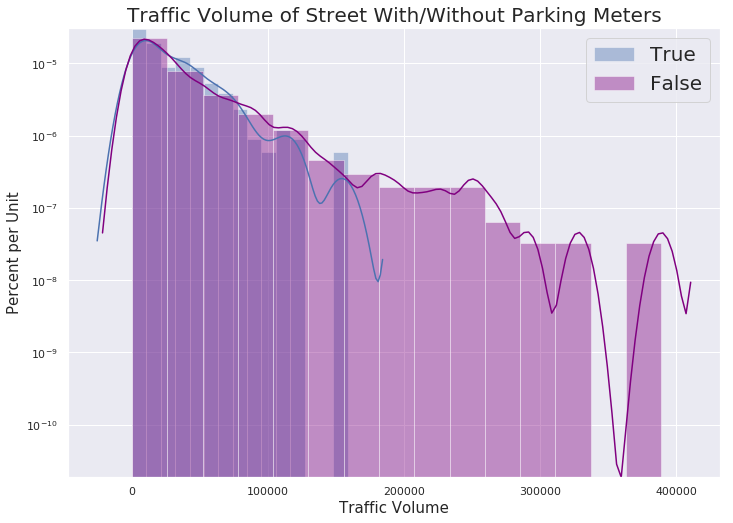

In [34]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot the histogram for the street with parking meters 
df_yes = df_combined[df_combined.has_meter == True]
ax1 = sns.distplot(df_yes['total_volume_count'], label='True', norm_hist=True, color='b', bins=15)
ax1.set_ylim(bottom=0.)
ax1.set_yscale('log')

df_no  = df_combined[df_combined.has_meter == False]
ax2 = sns.distplot(df_no['total_volume_count'], label='False', norm_hist=True, color='purple', bins=15)
ax2.set_ylim(bottom=0.)
ax2.set_yscale('log')

plt.legend(prop={'size': 20})
plt.title('Traffic Volume of Street With/Without Parking Meters', size=20)
x_label = plt.xlabel('Traffic Volume', size=15)
y_label = plt.ylabel('Percent per Unit', size=15)


* Based on the calculation and the log scaled histogram above, we see a difference between the means, which rasies the question whether there is a differnce between these two distribution? We decide to use hypothesis testing to solve this problem

__The Hypothesis__
* __Null Hypotheis__
    * In the population, the distribution of traffic volume is the same of the street with parking meters and of the street with no parking meters. 
* __Alternative Hypothesis__
    *  In the population, the traffic volume of street with parking meters is __lower__ than the traffic volume of street without parking meters  
    
__Test Statistic__
* The alternative hypothesis compares the average traffic volumes of the two groups and says that the average for street with parking meters is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

__Random Permutation__
* We decide to use the random permutation test to see whether the difference is due to chance or not. In this test, we will random shuffle the `True` and `False` label to calculate the statistic under the null hypothesis


In [35]:
mean_true  = df_combined[df_combined.has_meter == True]['total_volume_count'].mean()
mean_false = df_combined[df_combined.has_meter == False]['total_volume_count'].mean()
observed_mean_difference = mean_true - mean_false
print('The observed value of the test statistic is {}'.format(mean_true - mean_false))

The observed value of the test statistic is -5953.6195683930455


In [36]:
# to calculate the test statistic under the null hypothesis 
def one_simulated_difference():
    df_test = df_combined.copy()
    random_has_meter = df_test['has_meter'].tolist()
    np.random.shuffle(random_has_meter)
    df_test['has_meter'] = random_has_meter
    yes_mean = df_test[df_test['has_meter'] == True]['total_volume_count'].mean()
    no_mean  = df_test[df_test['has_meter'] == False]['total_volume_count'].mean()
    return yes_mean - no_mean

print('The difference between the means of two groups formed by randomly shuffling all the labels is {}'\
     .format(one_simulated_difference()))

The difference between the means of two groups formed by randomly shuffling all the labels is 3041.3707324263232


In [37]:
# Permutation Test 
differences = np.array([])
repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)   

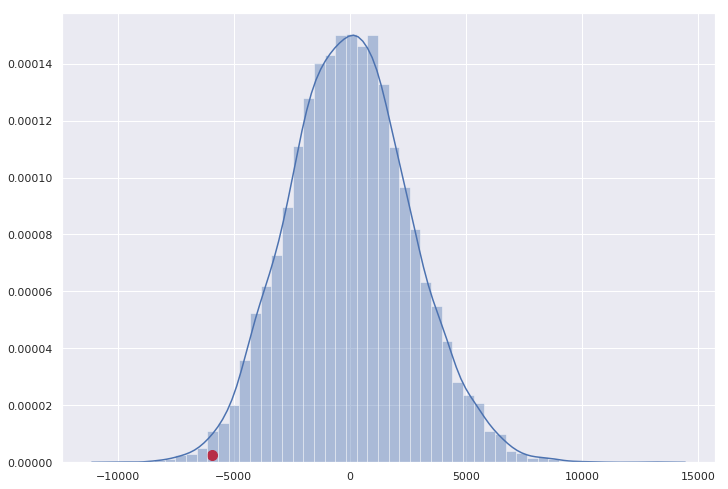

In [38]:
# draw the observed difference as a red point on the simulated histogram 
sns.distplot(differences)
plt.scatter(observed_mean_difference, 0.0000025, color='red', s=100)

In [39]:
empirical_p = np.count_nonzero(differences <= observed_mean_difference) / 10000
print('The p value for this test is {}'.format(empirical_p))

The p value for this test is 0.0078


* The observed difference is in the tail of the empirical distribution of the differences simulated under the null hypothesis.
* The empirical P-value is around 1% and therefore the result is statistically significant. The test __supports the alternative hypothesis__ that the mean traffic volume of street with parking meters is smaller than the traffic volume of street with no parking meter .

In [40]:
df_with_meter.head()

total_volume_count  meter_count  avg_max_hour  avg_pay  avg_duration  \
0               57667           47        2.0000     1.25      9.744681   
1                2298           28        2.0000     1.25      9.571429   
2               29194           11        2.0000     1.25     10.000000   
3               27384            2        2.0000     1.25     10.000000   
4              118715           20        1.9125     1.25      8.800000   

   sat_count  mobile_count  
0       47.0           0.0  
1       28.0           0.0  
2       11.0           0.0  
3        2.0           0.0  
4       20.0           0.0

In order to reduce the dimentionality of the variables, we use a scatter matrix to identify the correlations between different variables. 

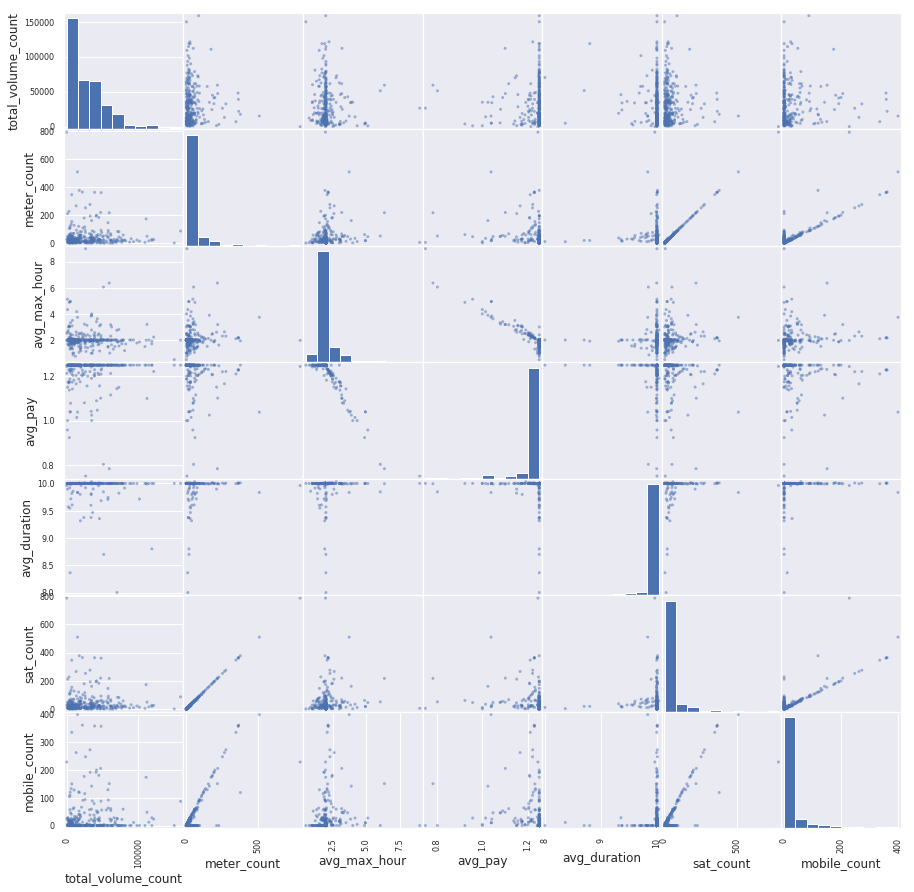

In [42]:
fig = pd.plotting.scatter_matrix(df_with_meter,figsize = (15,15))

As reflected on the graph, there are no obvious linear relationships between data of the traffic volume and any properties of the parking meters, indicating that there are no causation relationships between the traffic volume and the properties of the parking meters. However, we can see the correlation that streets with parking meters have less traffic than those without parking meters.

# Privacy and Ethics

* Our datasets come from the San Diego Open Data Portal, so there are no concerns for privacy because all the data uploaded are intended to be transparent to the public. Specifically, the Parking lot, restaurant and office building locations in San Diego are public information, and the traffic volume of San Diego is represented as total traffic of an area per day, eliminating any personal information. The datasets are also verified to be reliable, with no missing data because they are uploaded automatically from the City sources.

* Since the datasets are generalized over a vast region and are produced by the government, there should be no biases on objectivity. Furthermore, since the data from Open Data Portal is available for everyone to download and analyze, we believe our acquisition and study of the data is legal.

* Additionally, We examined the usage policy of Nominatim, the API for geocoding we used. We are required to limit our requests to avoid heavy uses, as well as limiting our request to a single thread and a single machine. Therefore, we only requested the data once and paused for a second between queries, ensuring we are not violating its user policy. 


# Discussion and Conclusion

Based off the results, it appears that the streets with parking meters have less traffic volume. However, its seems that none of the properties particularly contribute to the reduction of the traffic volume.

However there are some drawbacks and limitations to out study. Firstly, we lost quite a bit of data along the way due to missing values and the inability to geocode the meters. Wen cleaning the traffic dataset, we dropped 28% of the streets, which could have a large influence on the accountability of the data. This missing data has the potential to make a difference, as our data is now less representative of the Downtown San Diego Area. 

Secondly, when calculating the longitude and latitude span of the streets, we define all of them as either going from North to south or going from East to West. This might result in the misrepresentation of the actual street range since not all streets run either horizontally or vertically. Additionally, we defined the width of all the streets as 1/700 degrees, which is equivalent to 500 ft, because we could not find the actual length of each street. This could also influence the count of parking meters on each street because we might include meters outside the street or leave out meters on the street.

Thirdly, traffic count (the number of vehicles that passed) does not necessarily determine how bad the traffic is. Lastly, the Downtown San Diego area itself is not representative of the entire world, so these results may not apply to other places. 

Lastly, there are some inadvertent biases we did not address. For example, some of the traffic-heavy areas, such as freeways, do not have parking meters; and some of the places where people tend to stay for a long time, although with light traffic, have parking meters. Therefore, in our analysis, we should be aware of different scenarios where a parking lot is present.